In [1]:
from comer.datamodule import vocab
from comer.lit_comer import LitCoMER
from torchvision.transforms import ToTensor
import torch
from PIL import Image
from IPython.display import display

In [2]:
ckpt = '../pretrained/pretrained.ckpt'
img_name = 'test.bmp'

In [3]:
model = LitCoMER.load_from_checkpoint(ckpt)
model = model.eval()
device = torch.device("cpu")
model = model.to(device)

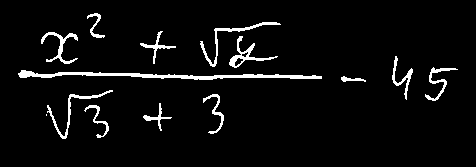

In [4]:
img = Image.open(img_name)
display(img)

In [5]:
img = ToTensor()(img)
mask = torch.zeros_like(img, dtype=torch.bool)
hyp = model.approximate_joint_search(img.unsqueeze(0), mask)[0]
pred_latex = vocab.indices2label(hyp.seq)

In [6]:
print(pred_latex)